# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application of web scraping technique using `BeautifulSoup4` library to get information we need.

## Background

Launched online in 1990 and a subsidiary of Amazon.com since 1998, IMDb is the world's most popular and authoritative source for movie, TV and celebrity content, designed to help fans explore the world of movies and shows and decide what to watch.
<br />
<br />
IMDB searchable database includes million of movies, TV and entertainment programs and cast and crew members.
<br />
<br />
In this capstone project, the student need to access IMDB movies released in 2021 database by following this link : `https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31`

## Setup Environments and Importing Requirements
In order to start the capstone project, we need to setup new environment to accommodate required library to run the script. The steps that need to be taken to setup the environment is shown below:
1. Create New Environment in Conda with Python version 3.8 installed
```
conda create -n Capstone_DA python=3.8
```
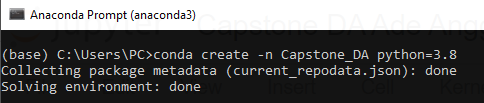
<br /> 
2. Activate the new environment we just created
```
conda activate Capstone_DA
```
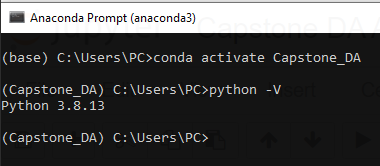
<br />
3. Navigate path to folder which file `requirements.txt` is located
```
D
cd "D:\002 - Folder Santos\010 - Pertamina\002 - Training\003 - Algoritma Full Stack Data Science\Capstone DA\web_scraping-main"
```
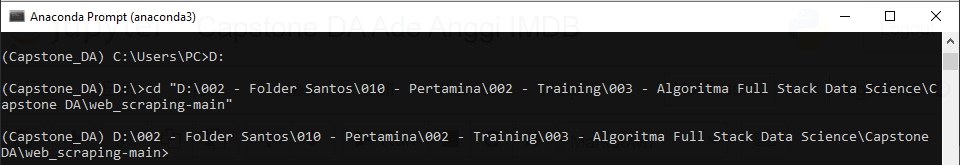
<br />
4. Install required packages from file `requirements.txt`
```
pip install -r requirements.txt
```
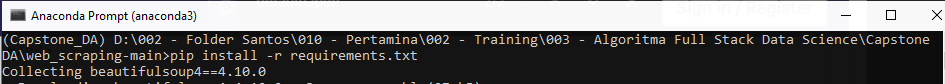
<br />
5. Install new kernel for `Capstone_DA`
```
pip install ipykernel
python -m ipykernel install --user --name=Capstone_DA
```

## Exporting Requirements
6. Export environment as a prove fo rubric setup environment
```
pip list --format=freeze > requirements_capstone.txt
```
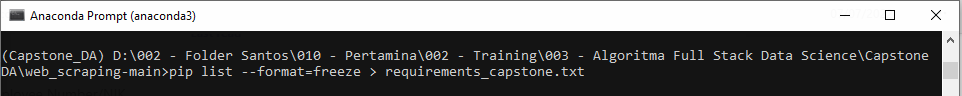

## Requesting the Data and Creating a BeautifulSoup
  
Let's begin with requesting the web from the site link in the Background section with `get` method.

`get` method will collect all of html text from the link.

In [1]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use `.content` to see what we exactly get, in here we slice it so it won't make our screen full of the html we get from the page. We can delete the slicing if we want to see what we fully get.

In [2]:
url_get.content[:500]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. For the first step, we need to identify unique tag which covers all required value for our extraction. Since we only need to find one unique tag, we will use `.find()` method since the method only find the first found tag.
<br />
<br />
Based on review from the soup variable, all values required for this case are located in `div` tag with `lister-list`class.

In [4]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt7144666">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt7144666/">
    <img alt="The Black Phone" class="loadlate" data-tconst="tt7144666" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BOWVmNTBiYTUtZWQ3Yi00ZDlhLTgyYjUtNzBhZjM3YjRiNGRkXkEyXkFqcGdeQXVyNzYyOTM1ODI@._V1_UX67_CR0,0,6


We can see one of movie title shown in the result and we can conduct thorough check to make sure we find the right tag for our purpose.

Next is finding row length. From inspect in website link, we know that all of required datas located inside `div` tag with `lister-item-content` class. That's why we can use `find_all` method to collect those tag and to make sure that the row length is 50 because the link provide use Top 50 most popular films in 2021. This row length variable will be used inside our looping process later on.

In [5]:
row_length = len(table.find_all('div', attrs={'class':'lister-item-content'}))

For this capstone, we required to collect list of `Movie Name`, `IMDB Rating`, `Metascore`, and `Votes`. Those data will be converted into one Pandas Data Frame for further analysis.
#### Scraping Movie Name
1. Let's start with Movie Name, we can get movie name from the website inside `h3` tag with `lister-item-header` class. So we can use `find_all` method from `table` variable to collect 50 `h3` tag that store the movie name inside `movie_name` variable.
2. After we get the right tag, we know that movie name can be extracted from `a` tag by using `find` method from `movie_name` variable combined with `.text`.
3. In order to store the movie name when doing looping process, we will create blank list called `movie_list` to store the data.
<br />

#### Scraping IMDB Rating
1. Next we will extract IMDB Rating, we can get IMDB Rating from the website inside `div` tag with `inline-block ratings-imdb-rating` class. So we can use `find_all` method from `table` variable to collect 50 `div` tag that store the IMDB Rating inside `imdb_rating` variable.
2. After we get the right tag, we know that movie name can be extracted from `strong` tag by using `find` method from `imdb_rating` variable combined with `.text`.
3. In order to store the IMDB Rating when doing looping process, we will create blank list called `imdb_rating_list` to store the data.
<br />

#### Scraping Metascore
1. Next we will extract Metascore, we can get Metascore from the website inside `div` tag with `ratings-bar` class. So we can use `find_all` method from `table` variable to collect 50 `div` tag that store the Metascore inside `metascore_rating` variable.
2. After we get the right tag, we know that movie name can be extracted from `div` tag with `inline-block ratings-metascore` class by using `find` method from `metascore_rating` variable. combined with `.text`.
3. Next we need to add more `find` method from `span` tag and combined with `.text` to extract Metascore value.
4. In order to store the Metascore when doing looping process, we will create blank list called `imdb_rating_list` to store the data. Specifically for Metascore, we need to be careful when doing the looping process because not every movie has metascore. That will become a proble when checking the `div` tag with `inline-block ratings-metascore` class due to error output will stop our looping. In order to mitigate this, we need to do error handling process by incorporating `try` and `except` command. This method will replace error output with value assigned by us and we will assigned zero to replace the error. We fill the error output with zero because later on we need to change data type in Metascore column from object to int64.
5. in this looping process, we will also conduct a little data wrangling process to remove excess whitespace with `strip` method.
<br />

#### Scraping IMDB Votes
1. Next we will extract IMDB Votes, we can get IMDB Votes from the website inside `p` tag with `sort-num_votes-visible` class. So we can use `find_all` method from `table` variable to collect 50  `p` tag that store the IMDB Votes inside `imdb_votes` variable.
2. After we get the right tag, we know that movie name can be extracted from `span` tag with `nv` name by using `find` method from `imdb_votes` variable combined with `.text`. In this step, we have an interesting finding. Actually some movies have 2 `span` tag with `nv` name inside `p` tag with `sort-num_votes-visible` class which stores Votes and Gross Revenue value. Fortunately, the order start with Votes and we don't need to worry to extract wrong value with `find` method. But if the order is changed, we need to conduct extra step in consideration of removing Gross Revenue Value
3. In order to store the movie name when doing looping process, we will create blank list called `imdb_rating_list` to store the data. But we also need to conduct data wrangling to remove `,` inside Votes value because we need to change Votes data types from object to int later on.

In [6]:
#creating table
#find_all movie name list
movie_name = table.find_all('h3', attrs={'class':'lister-item-header'})
imdb_rating = table.find_all('div', attrs={'class':'inline-block ratings-imdb-rating'})
metascore_rating=table.find_all('div', attrs={'class':'ratings-bar'})
imdb_votes=table.find_all('p', attrs={'class':'sort-num_votes-visible'})

#Create looping to collect movie name
movie_list = []
imdb_rating_list = []
metascore_list=[]
vote_list = []
for i in range(row_length):
    movie_list.append(movie_name[i].find('a').text)
    imdb_rating_list.append(imdb_rating[i].find('strong').text)
    try:
        metascore_list.append(metascore_rating[i].find('div', attrs={'class':'inline-block ratings-metascore'}).find('span').text.strip())
    except:
        metascore_list.append('0')
    vote_list.append(imdb_votes[i].find('span', attrs={'name':'nv'}).text.replace(',',''))

## Creating data frame & Data wrangling

Since we done with our scraping process and we already have every data we need (Movie Name, IMDB Rating, Metascore, and IMDB Votes), now we can put the lists into pandas dataframe

In [7]:
import pandas as pd

df = pd.DataFrame({'Movie_Name':movie_list,
                   'IMDB_Rating':imdb_rating_list,
                   'Metascore':metascore_list,
                   'Votes':vote_list,
                  })
df.head()

,Movie_Name,IMDB_Rating,Metascore,Votes
0,The Black Phone,7.3,65,23714
1,Only Murders in the Building,8.1,0,73507
2,Sing 2,7.4,49,55541
3,Spider-Man: No Way Home,8.3,71,672875
4,1883,8.8,0,56044


Our current dataframe still consists of 50 Movie Name, while we only need to display the first 7 rows from the dataframe. We also need to change data types from column IMDB_Rating, Metascore, and Votes. This will be part of our data cleaning.

In [8]:
df[['Metascore','Votes']]=df[['Metascore','Votes']].astype('int64')
df['IMDB_Rating']=df['IMDB_Rating'].astype('float64')
df.dtypes

Movie_Name      object
IMDB_Rating    float64
Metascore        int64
Votes            int64
dtype: object

In [9]:
df.head(7)

,Movie_Name,IMDB_Rating,Metascore,Votes
0,The Black Phone,7.3,65,23714
1,Only Murders in the Building,8.1,0,73507
2,Sing 2,7.4,49,55541
3,Spider-Man: No Way Home,8.3,71,672875
4,1883,8.8,0,56044
5,No Time to Die,7.3,68,372866
6,Superman & Lois,7.8,0,30541


#### Data visualisation
Looking at the dataframe, we now that the most appropriate plot that can accommodate our dataframe is probably bar chart. That's why we will create 3 bar chart for IMDB_Rating, Metascore, and Votes. Each chart will be sorted based on their respected value.

<AxesSubplot:xlabel='Movie_Name'>

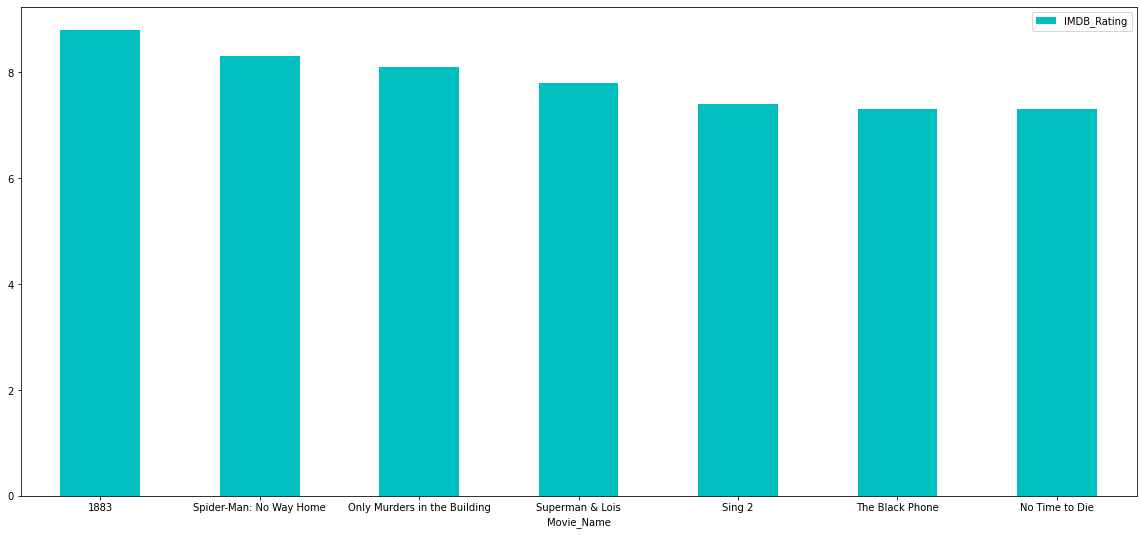

In [10]:
df[['Movie_Name','IMDB_Rating']].head(7).sort_values(by='IMDB_Rating', 
                                                     ascending=False).plot(x='Movie_Name', 
                                                                           kind='bar',color='c', 
                                                                           rot=0, figsize = (20,9))

<AxesSubplot:xlabel='Movie_Name'>

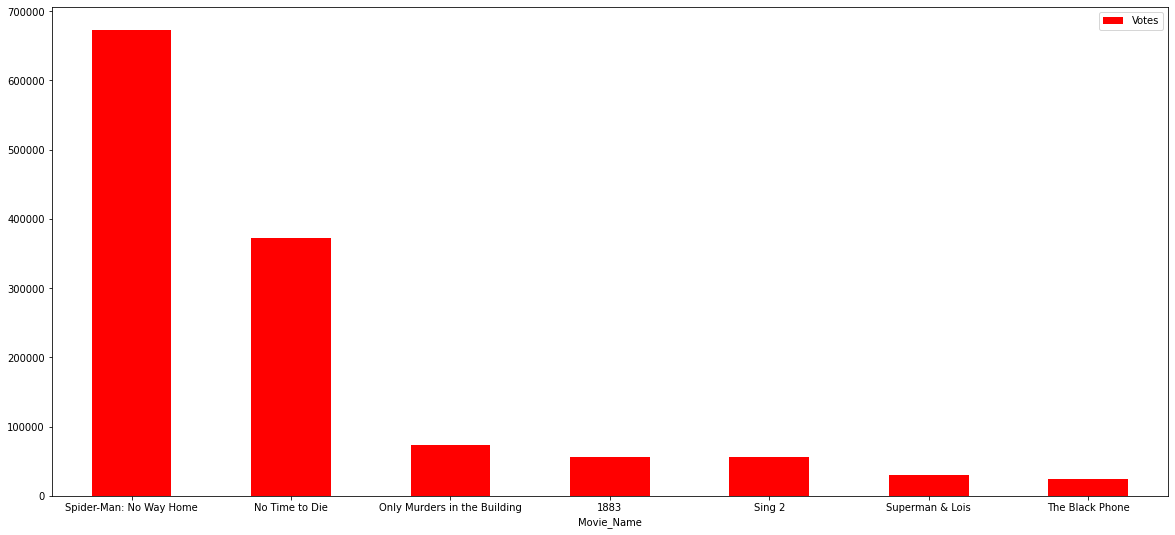

In [11]:
df[['Movie_Name','Votes']].head(7).sort_values(by='Votes', 
                                                   ascending=False).plot(x='Movie_Name', 
                                                                         kind='bar',color='r', 
                                                                         rot=0, figsize = (20,9))

<AxesSubplot:xlabel='Movie_Name'>

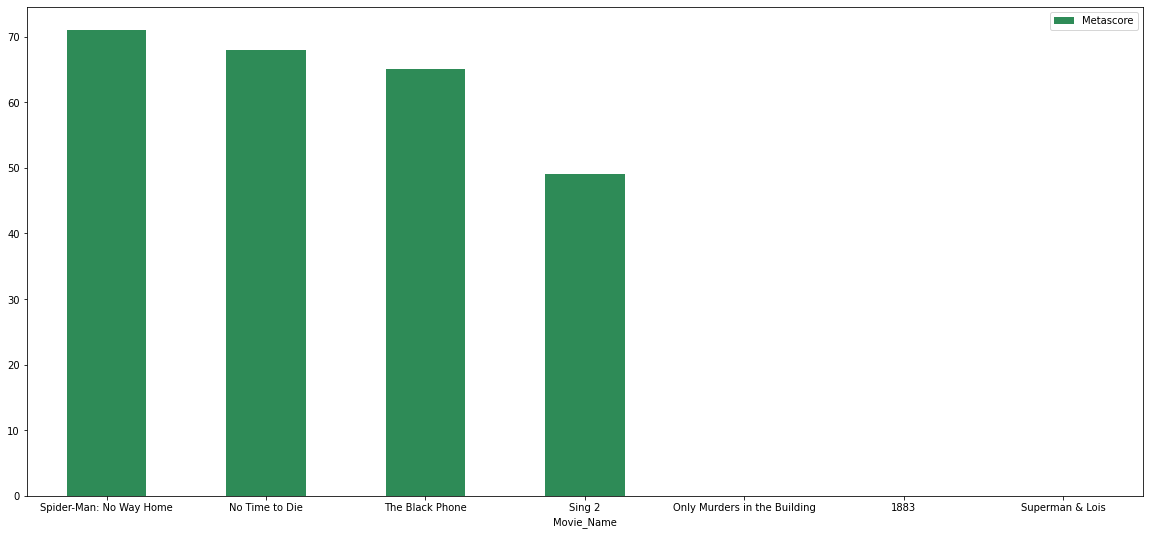

In [12]:
df[['Movie_Name','Metascore']].head(7).sort_values(by='Metascore', 
                                                   ascending=False).plot(x='Movie_Name', 
                                                                         kind='bar',color='seagreen', 
                                                                         rot=0, figsize = (20,9))

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


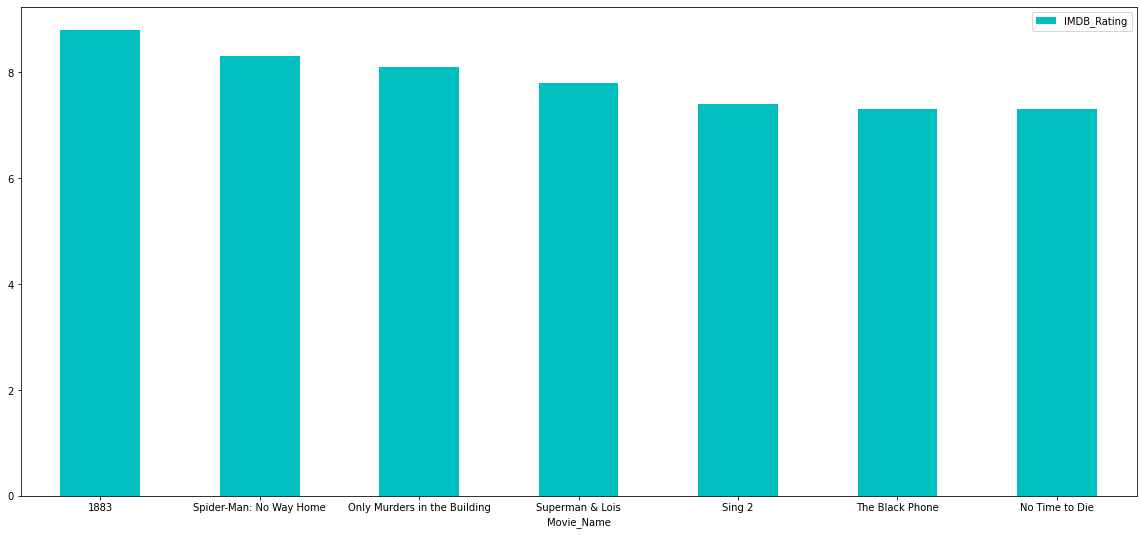

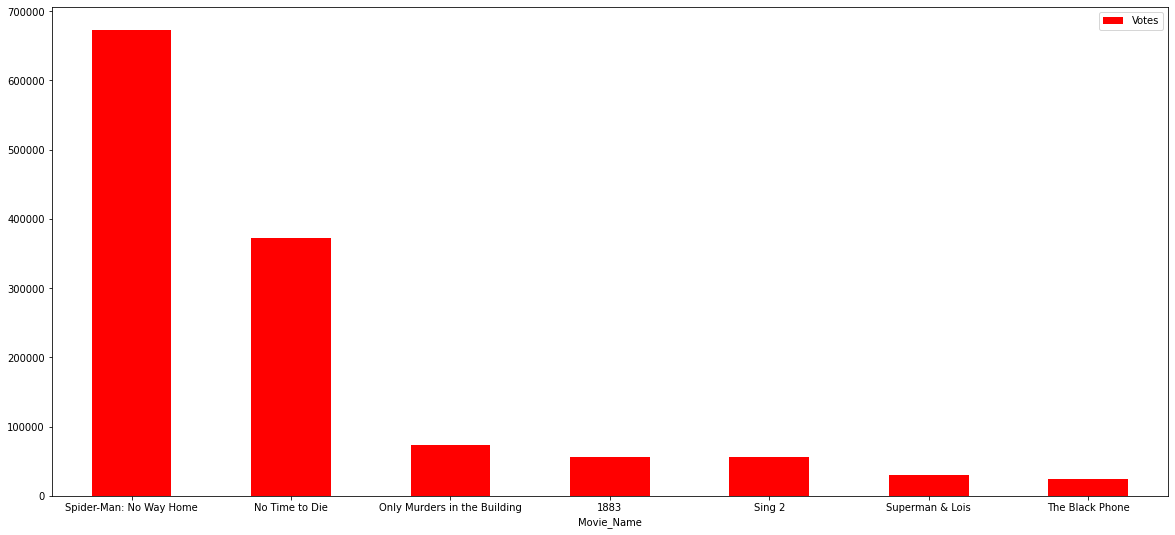

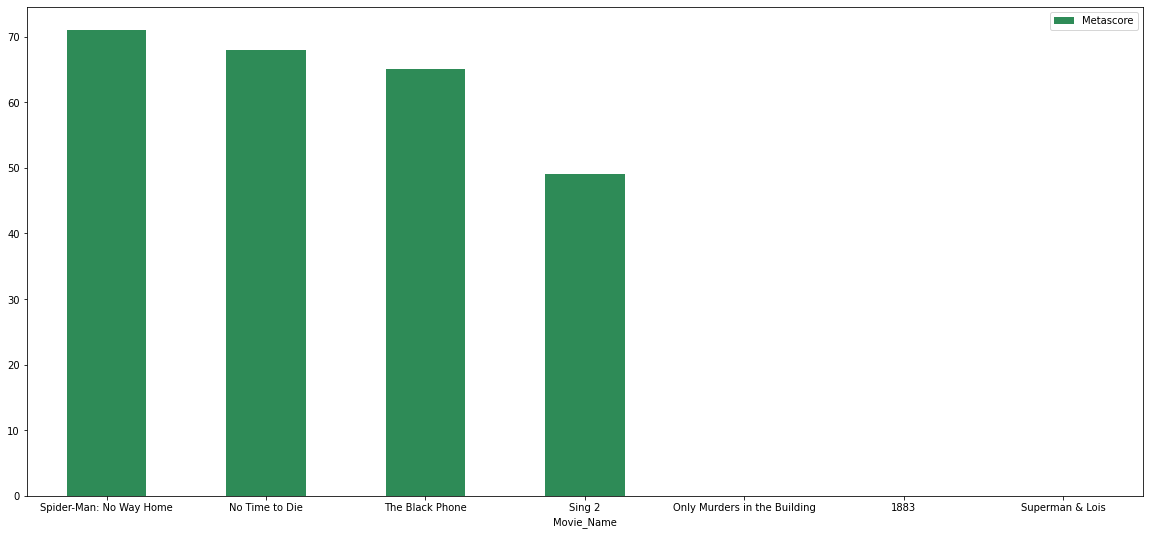

In [13]:
print(df[['Movie_Name','IMDB_Rating']].head(7).sort_values(by='IMDB_Rating', 
                                                     ascending=False).plot(x='Movie_Name', 
                                                                           kind='bar',color='c', 
                                                                           rot=0, figsize = (20,9)))
print(df[['Movie_Name','Votes']].head(7).sort_values(by='Votes', 
                                                   ascending=False).plot(x='Movie_Name', 
                                                                         kind='bar',color='r', 
                                                                         rot=0, figsize = (20,9)))
print(df[['Movie_Name','Metascore']].head(7).sort_values(by='Metascore', 
                                                   ascending=False).plot(x='Movie_Name', 
                                                                         kind='bar',color='seagreen', 
                                                                         rot=0, figsize = (20,9)))

Analysis:
<br />
1. `1883` ranked first out of 7 based on IMDB Rating followed by `Spider-Man: No Way Home`. While `No Time to Die` ranked last from our data.
2. `Spider-Man: No Way Home` ranked first out of 7 based on IMDB Votes While `The Black Phone` ranked last from our data.
3. `Spider-Man: No Way Home` ranked first out of 7 based on IMDB Votes. But from Top 7 most popular movies in 2021, only 4 movies that have Metascore.
<br />
<br />
Conclusion:
<br />
1. If we are looking at the ranking from each columns, `Spider-Man: No Way Home` should be in the first overall ranking based on those 3 criterias.
2. In order to improve the data, we suggest for Metascore to gives the score for the 3 movies that don't have Metascore.

### Extra Challenge

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.